# Honey Bee Analysis

# 1. Introduction

# Honey Bee Colony Data

This dataset contains a record of various honey bee colony data grouped by state and quarter. The data covers years 2015-2023.

## Terms and Definitions

### Added Colonies
A new or replacement, surviving colony that was either created or purchased whole by an operation.

### Colony
A hive containing a queen honey bee and attendant worker bees and/or drone bees.

### Colony Collapse Disorder (CCD) Criteria
Colonies reported as being lost due to CCD must have fully met four criteria:

1. Little to no build-up of dead bees in the hive or at the hive entrance.
2. Rapid loss of adult honey bee population despite the presence of a queen, capped brood, and food reserves.
3. Absence or delayed robbing of the food reserves.
4. Loss not attributable to varroa or nosema loads.

Colonies lost due to CCD were collected on a quarterly basis for operations with five or more colonies.

### Lost Colony
A completely failed colony, loss of most workers, and possibly the queen. Colony is no longer viable. Sometimes referred to as a dead out.

### Maximum Colonies
Refers to the sum of colonies in a state on the first of the quarter plus all those moved into the state during that period. Maximum colonies are considered the base number from which a data user can do further analysis. It does not include the colonies that were added, lost, or renovated in the state. Colonies are counted in every state they were in during the quarter; therefore, a national level maximum number of colonies cannot be calculated due to duplication.

### Percent Lost
The state-level percentage of colonies lost is the number of colonies lost in that state divided by the maximum colonies for that state. The national level percentage of colonies lost is the total number of all colonies lost in the United States divided by the number of colonies on the first of the quarter.

### Percent Renovated
The state-level percentage of colonies renovated is the number of colonies renovated in that state divided by the maximum colonies for that state. The national level percentage of colonies renovated is the total number of all colonies renovated in the United States divided by the number of colonies on the first of the quarter.

### Renovated Colony
An existing colony that was requeened or received a nuc or package.

### Stressors
State-level colony health stressors for operations with five or more colonies are the percent of the maximum colonies reported to be affected, by quarter. The national level colony stressors are the summed number for the United States divided by the number of colonies on the first of the quarter.


## 1.1 Import Libraries & Load Data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

C:\Users\ckjar\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load Data
df = pd.read_csv('../Data/data.csv')
df.head()

Quarter    State  Colonies_Added_And_Replaced  Max_Colonies  \
0  2015_Q1  ALABAMA                     2800.000      7000.000   
1  2015_Q2  ALABAMA                     1900.000      7500.000   
2  2015_Q3  ALABAMA                      160.000      9000.000   
3  2015_Q4  ALABAMA                       80.000      8000.000   
4  2016_Q1  ALABAMA                     2100.000      7500.000   

   Pct_Affected_Deadout  Pct_Affected_Disease  Pct_Affected_Other  \
0                26.000                 0.000               9.100   
1                12.000                 0.000               3.200   
2                16.000                 0.000               2.200   
3                 8.000                 0.200               2.800   
4                23.000                 4.300               2.400   

   Pct_Affected_Pesticides  Pct_Affected_Pests  Pct_Affected_Unknown  \
0                    2.200               5.400                 9.400   
1                    2.300              42.500                 4.100   
2                    2.600              70.600                17.700   
3                    0.200               6.400                 1.900   
4                    8.100              22.000                11.300   

   Pct_Affected_Varroa_Mites  Num_Renovated  Pct_Renovated  \
0                     10.000        250.000          4.000   
1                     16.700        680.000          9.000   
2                     63.100        260.000          3.000   
3                      3.100         60.000          1.000   
4                     24.200         90.000          1.000   

   Max_Colonies_Pct_Change  Pct_Affected_Colony_Collapse_Disorder  
0                      NaN                                    NaN  
1                    7.143                                    NaN  
2                   20.000                                    NaN  
3                  -11.111                                    NaN  
4                   -6.250                                    NaN

# 2. Basic Exploration

In [3]:
df.head()

Quarter    State  Colonies_Added_And_Replaced  Max_Colonies  \
0  2015_Q1  ALABAMA                     2800.000      7000.000   
1  2015_Q2  ALABAMA                     1900.000      7500.000   
2  2015_Q3  ALABAMA                      160.000      9000.000   
3  2015_Q4  ALABAMA                       80.000      8000.000   
4  2016_Q1  ALABAMA                     2100.000      7500.000   

   Pct_Affected_Deadout  Pct_Affected_Disease  Pct_Affected_Other  \
0                26.000                 0.000               9.100   
1                12.000                 0.000               3.200   
2                16.000                 0.000               2.200   
3                 8.000                 0.200               2.800   
4                23.000                 4.300               2.400   

   Pct_Affected_Pesticides  Pct_Affected_Pests  Pct_Affected_Unknown  \
0                    2.200               5.400                 9.400   
1                    2.300              42.500                 4.100   
2                    2.600              70.600                17.700   
3                    0.200               6.400                 1.900   
4                    8.100              22.000                11.300   

   Pct_Affected_Varroa_Mites  Num_Renovated  Pct_Renovated  \
0                     10.000        250.000          4.000   
1                     16.700        680.000          9.000   
2                     63.100        260.000          3.000   
3                      3.100         60.000          1.000   
4                     24.200         90.000          1.000   

   Max_Colonies_Pct_Change  Pct_Affected_Colony_Collapse_Disorder  
0                      NaN                                    NaN  
1                    7.143                                    NaN  
2                   20.000                                    NaN  
3                  -11.111                                    NaN  
4                   -6.250                                    NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Quarter                                1514 non-null   object 
 1   State                                  1514 non-null   object 
 2   Colonies_Added_And_Replaced            1512 non-null   float64
 3   Max_Colonies                           1512 non-null   float64
 4   Pct_Affected_Deadout                   1504 non-null   float64
 5   Pct_Affected_Disease                   1361 non-null   float64
 6   Pct_Affected_Other                     1460 non-null   float64
 7   Pct_Affected_Pesticides                1408 non-null   float64
 8   Pct_Affected_Pests                     1453 non-null   float64
 9   Pct_Affected_Unknown                   1418 non-null   float64
 10  Pct_Affected_Varroa_Mites              1510 non-null   float64
 11  Num_

In [5]:
df.shape

(1514, 15)

In [6]:
df.isnull().sum() / len(df) * 100

Quarter                                  0.000
State                                    0.000
Colonies_Added_And_Replaced              0.132
Max_Colonies                             0.132
Pct_Affected_Deadout                     0.661
Pct_Affected_Disease                    10.106
Pct_Affected_Other                       3.567
Pct_Affected_Pesticides                  7.001
Pct_Affected_Pests                       4.029
Pct_Affected_Unknown                     6.341
Pct_Affected_Varroa_Mites                0.264
Num_Renovated                            1.717
Pct_Renovated                            7.266
Max_Colonies_Pct_Change                  3.170
Pct_Affected_Colony_Collapse_Disorder   47.688
dtype: float64

In [7]:
df.describe()

Colonies_Added_And_Replaced  Max_Colonies  Pct_Affected_Deadout  \
count                     1512.000      1512.000              1504.000   
mean                     16405.390    158387.566                11.215   
std                      64943.335    552679.200                 7.343   
min                          0.000      1300.000                 0.000   
25%                        407.500     10000.000                 6.000   
50%                       1700.000     23000.000                10.000   
75%                       6000.000     81000.000                14.000   
max                     736920.000   4163700.000                65.000   

       Pct_Affected_Disease  Pct_Affected_Other  Pct_Affected_Pesticides  \
count              1361.000            1460.000                 1408.000   
mean                  3.847               6.340                    6.632   
std                   6.971               6.588                    9.117   
min                   0.000               0.000                    0.000   
25%                   0.400               1.900                    0.600   
50%                   1.500               4.300                    3.100   
75%                   4.600               8.425                    9.125   
max                  87.400              61.400                   73.500   

       Pct_Affected_Pests  Pct_Affected_Unknown  Pct_Affected_Varroa_Mites  \
count            1453.000              1418.000                   1510.000   
mean               11.235                 4.305                     30.152   
std                12.916                 5.062                     18.785   
min                 0.000                 0.000                      0.000   
25%                 2.300                 1.100                     15.700   
50%                 7.200                 2.800                     27.200   
75%                15.200                 5.700                     41.900   
max                91.900                46.800                     98.800   

       Num_Renovated  Pct_Renovated  Max_Colonies_Pct_Change  \
count       1488.000       1404.000                 1466.000   
mean       13980.793          7.709                   19.266   
std        57997.297          9.104                  126.287   
min            0.000          0.000                  -89.500   
25%          177.500          2.000                  -16.667   
50%          865.000          5.000                    0.000   
75%         3925.000         11.000                   19.355   
max       762550.000         77.000                 2614.286   

       Pct_Affected_Colony_Collapse_Disorder  
count                                792.000  
mean                                   2.845  
std                                    4.092  
min                                    0.000  
25%                                    0.754  
50%                                    1.795  
75%                                    3.567  
max                                   77.778

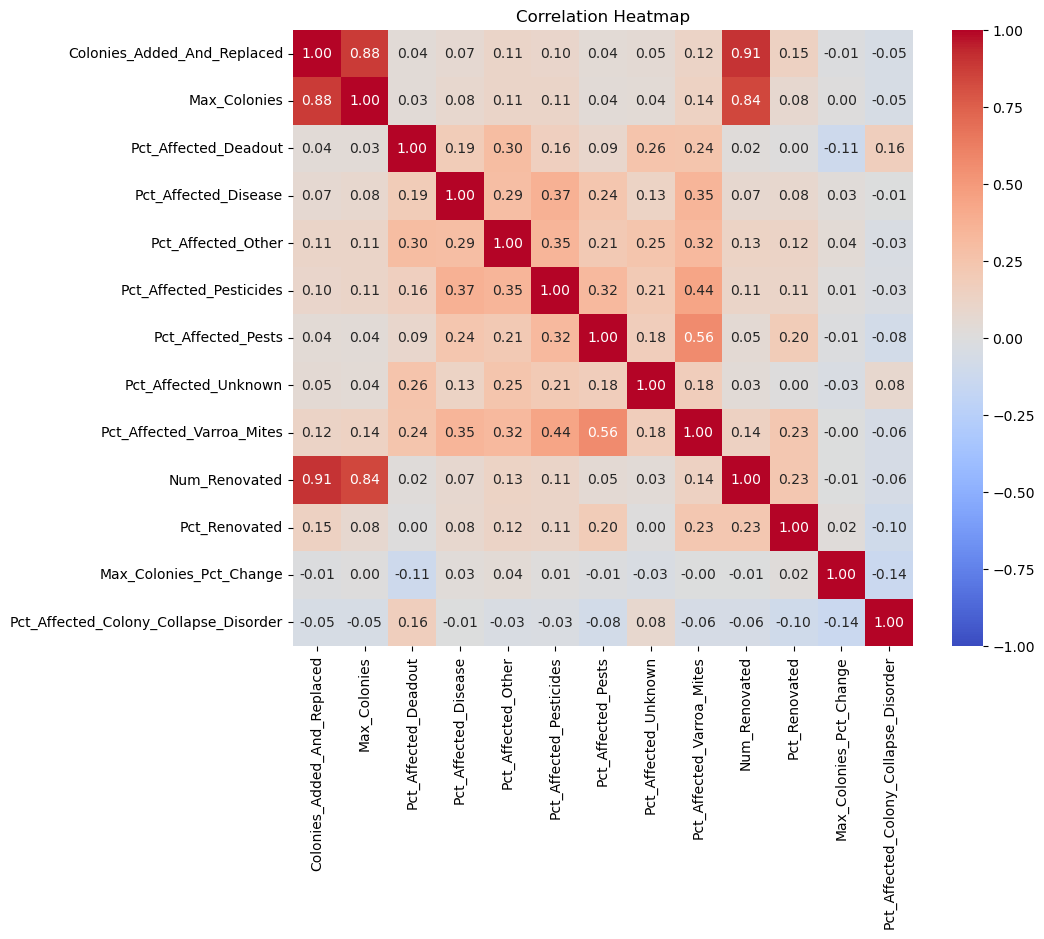

In [47]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [145]:
df.State.nunique()

46

In [9]:
def interactive_lineplot(state, y_variable):
    df_state = df[df['State'] == state]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_state, x='Quarter', y=y_variable)  # Removed unnecessary curly braces
    plt.title(f'{y_variable} Over Time in {state}')
    plt.xlabel('Quarter')
    plt.ylabel(y_variable)
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()

state_dropdown = widgets.Dropdown(options=df['State'].unique(), description='Select a State:')

y_vars = df.columns[2:]
y_var_dropdown = widgets.Dropdown(options=y_vars, description='Select a Variable to Plot on the X-Axis:')

interact(interactive_lineplot, state=state_dropdown, y_variable=y_var_dropdown);  # 

interactive(children=(Dropdown(description='Select a State:', options=('ALABAMA', 'ARIZONA', 'ARKANSAS', 'CALI…

In [10]:
states_df = df[df['State'] != 'US TOTAL']

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_highest_average(dataframe, y_variable, top_n=10):
    filtered_df = dataframe[dataframe['State'] != 'US TOTAL']
    top_values = filtered_df.groupby('State')[y_variable].mean().nlargest(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_values.index, y=top_values.values)
    plt.title(f'Top {top_n} States by Highest Avg {y_variable}')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

y_vars = df.columns[2:]
y_var_dropdown = widgets.Dropdown(options=y_vars, description='Select a Variable to Plot:')
interact(plot_highest_average, dataframe=widgets.fixed(df), y_variable=y_var_dropdown, top_n=widgets.fixed(10))


interactive(children=(Dropdown(description='Select a Variable to Plot:', options=('Colonies_Added_And_Replaced…

<function __main__.plot_highest_average(dataframe, y_variable, top_n=10)>

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_lowest_average(dataframe, y_variable, top_n=10):
    filtered_df = dataframe[dataframe['State'] != 'US TOTAL']
    top_values = filtered_df.groupby('State')[y_variable].mean().nsmallest(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_values.index, y=top_values.values)
    plt.title(f'Top {top_n} States by Lowest Avg {y_variable}')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

y_vars = df.columns[2:]
y_var_dropdown = widgets.Dropdown(options=y_vars, description='Select a Variable to Plot:')
interact(plot_lowest_average, dataframe=widgets.fixed(df), y_variable=y_var_dropdown, top_n=widgets.fixed(10))


interactive(children=(Dropdown(description='Select a Variable to Plot:', options=('Colonies_Added_And_Replaced…

<function __main__.plot_lowest_average(dataframe, y_variable, top_n=10)>

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_highest_last_quarter(dataframe, y_variable, top_n):
    filtered_df = dataframe[(dataframe['Quarter'] == '2023_Q2') & (dataframe['State'] != 'US TOTAL')]
    top_values = filtered_df.groupby('State')[y_variable].sum().nlargest(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_values.index, y=top_values.values)
    plt.title(f'Top {top_n} States by Highest {y_variable} Last Quarter')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

y_vars = df.columns[2:]
y_var_dropdown = widgets.Dropdown(options=y_vars, description='Select a Variable to Plot:')
interact(plot_highest_last_quarter, dataframe=widgets.fixed(df), y_variable=y_var_dropdown, top_n=widgets.fixed(5))


interactive(children=(Dropdown(description='Select a Variable to Plot:', options=('Colonies_Added_And_Replaced…

<function __main__.plot_highest_last_quarter(dataframe, y_variable, top_n)>

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_lowest_last_quarter(dataframe, y_variable, top_n):
    filtered_df = dataframe[(dataframe['Quarter'] == '2023_Q2') & (dataframe['State'] != 'US TOTAL')]
    top_values = filtered_df.groupby('State')[y_variable].sum().nsmallest(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_values.index, y=top_values.values)
    plt.title(f'Top {top_n} States by Lowest {y_variable} Last Quarter')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

y_vars = df.columns[2:]
y_var_dropdown = widgets.Dropdown(options=y_vars, description='Select a Variable to Plot:')
interact(plot_lowest_last_quarter, dataframe=widgets.fixed(df), y_variable=y_var_dropdown, top_n=widgets.fixed(5))


interactive(children=(Dropdown(description='Select a Variable to Plot:', options=('Colonies_Added_And_Replaced…

<function __main__.plot_lowest_last_quarter(dataframe, y_variable, top_n)>

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_highest_average_four_quarters(dataframe, y_variable, top_n):
    filtered_df = dataframe[((dataframe['Quarter'] == '2022_Q3') | (dataframe['Quarter'] == '2022_Q4')) & (dataframe['State'] != 'US TOTAL')]
    top_values = filtered_df.groupby('State')[y_variable].mean().nlargest(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_values.index, y=top_values.values)
    plt.title(f'Top {top_n} States by Highest Average {y_variable} in Last 4 Quarters ')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

y_vars = df.columns[2:]
y_var_dropdown = widgets.Dropdown(options=y_vars, description='Select a Variable to Plot:')
interact(plot_highest_average_four_quarters, dataframe=widgets.fixed(df), y_variable=y_var_dropdown, top_n=widgets.fixed(5))


interactive(children=(Dropdown(description='Select a Variable to Plot:', options=('Colonies_Added_And_Replaced…

<function __main__.plot_highest_average_four_quarters(dataframe, y_variable, top_n)>

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_lowest_average_four_quarters(dataframe, y_variable, top_n):
    filtered_df = dataframe[((dataframe['Quarter'] == '2022_Q3') | (dataframe['Quarter'] == '2022_Q4')) & (dataframe['State'] != 'US TOTAL')]
    top_values = filtered_df.groupby('State')[y_variable].mean().nsmallest(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_values.index, y=top_values.values)
    plt.title(f'Top {top_n} States by Lowest Average {y_variable} in Last 4 Quarters ')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

y_vars = df.columns[2:]
y_var_dropdown = widgets.Dropdown(options=y_vars, description='Select a Variable to Plot:')
interact(plot_lowest_average_four_quarters, dataframe=widgets.fixed(df), y_variable=y_var_dropdown, top_n=widgets.fixed(5))


interactive(children=(Dropdown(description='Select a Variable to Plot:', options=('Colonies_Added_And_Replaced…

<function __main__.plot_lowest_average_four_quarters(dataframe, y_variable, top_n)>

In [17]:
df_2023_Q2 = states_df[states_df['Quarter'] == '2023_Q2']
df_2015_Q1 = states_df[states_df['Quarter'] == '2015_Q1']

merged_df = pd.merge(df_2023_Q2, df_2015_Q1, on='State', suffixes=('_2023_Q2', '_2015_Q1'))
merged_df['colony_diff'] = merged_df['Max_Colonies_2023_Q2'] - merged_df['Max_Colonies_2015_Q1']
merged_df['pct_lost'] = (merged_df['colony_diff'] / merged_df['Max_Colonies_2015_Q1']) * 100
merged_df = merged_df.sort_values(by='colony_diff', ascending=True)

top_5_most_lost = merged_df[['State', 'colony_diff']].head(5)
top_5_most_lost['colony_diff'] = abs(top_5_most_lost['colony_diff'])

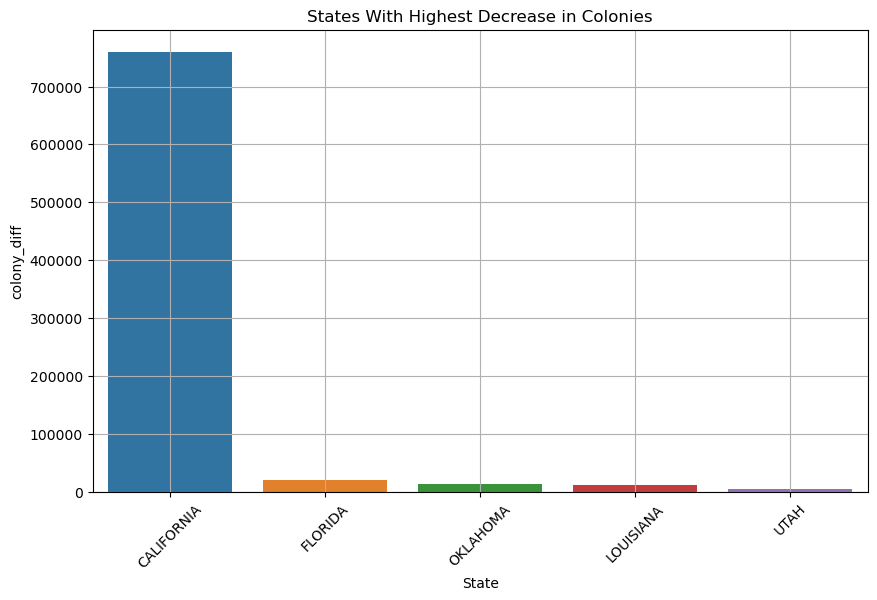

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_most_lost, x='State', y='colony_diff')
plt.title('States With Highest Decrease in Colonies')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [19]:
merged_df = merged_df.sort_values(by='pct_lost', ascending=True)

top_5_most_lost_pct = merged_df[['State', 'pct_lost']].head(5)
top_5_most_lost_pct['pct_lost'] = abs(top_5_most_lost_pct['pct_lost'])

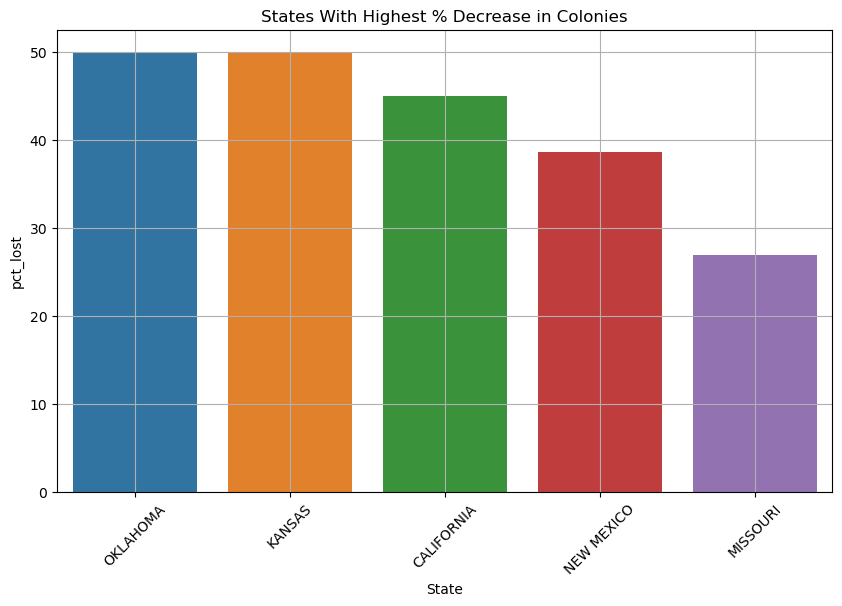

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_most_lost_pct, x='State', y='pct_lost')
plt.title('States With Highest % Decrease in Colonies')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [21]:
merged_df = merged_df.sort_values(by='colony_diff', ascending=False)

top_5_most_gained = merged_df[['State', 'colony_diff']].head(5)

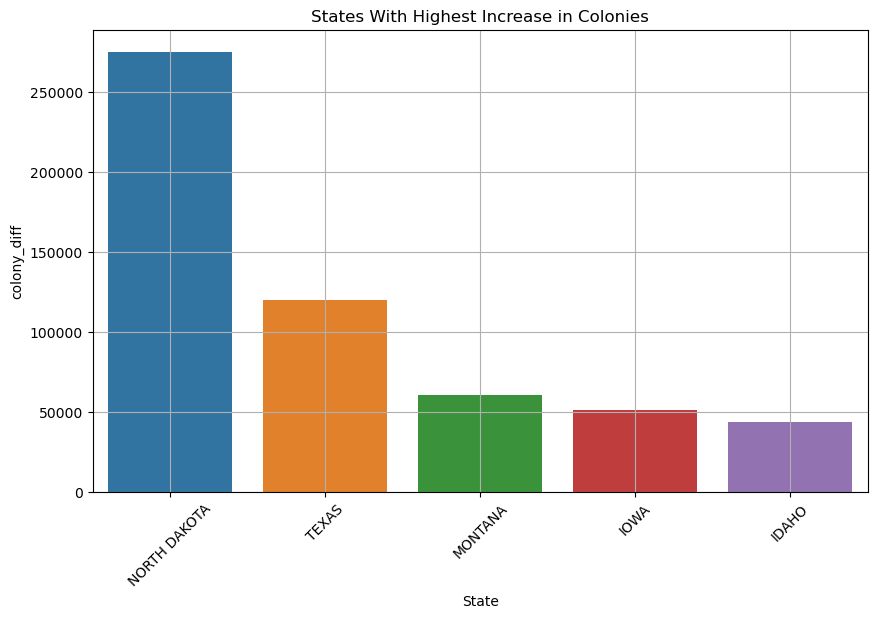

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_most_gained, x='State', y='colony_diff')
plt.title('States With Highest Increase in Colonies')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [23]:
merged_df = merged_df.sort_values(by='pct_lost', ascending=False)
top_5_most_gained_pct = merged_df[['State', 'pct_lost']].head(5)

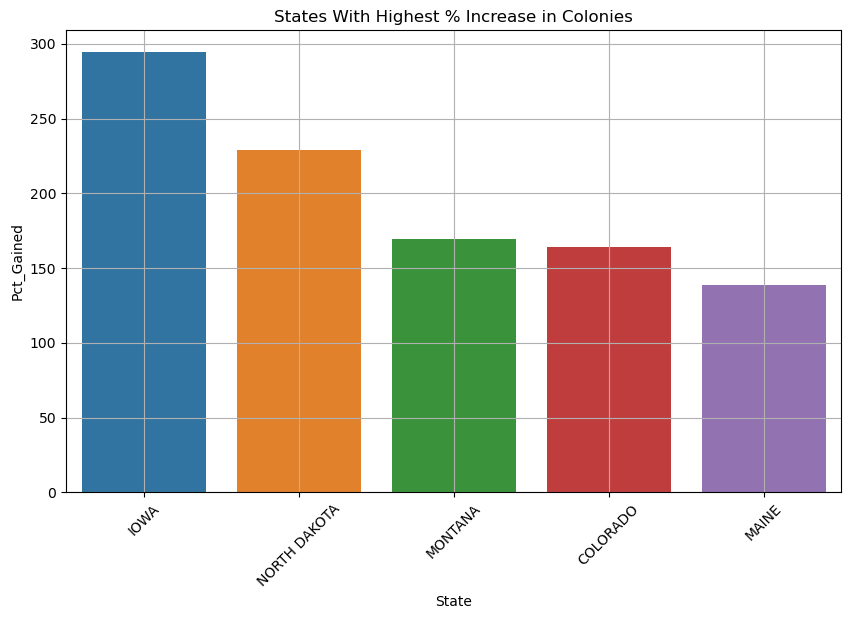

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_most_gained_pct, x='State', y='pct_lost')
plt.title('States With Highest % Increase in Colonies')
plt.xticks(rotation=45)
plt.ylabel('Pct_Gained')
plt.grid()
plt.show()